<a href="https://colab.research.google.com/github/graccelle/Project/blob/master/Shopify_Data_Science_Intern_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Shopify Data Science Intern Challenge - Summer 2022**

Grace T Babalola

01/18/2022

Data made available by Shopify and accessible [HERE](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

Link to the complete python code is on [my github](https://github.com/graccelle/Project) 

### **Problem set 1:**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.  

1.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
2.   What metric would you report for this dataset?
3.   What is its value?

**Solution Approach**

Step 1: Import required libraries and dataset

In [139]:
# Import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Visualization of data
import matplotlib.pyplot as plt # Ploting graphs
import plotly.express as px # To plot interactive graphs
import plotly.io as pio
pio.renderers.default = "colab"

In [140]:
# Import data
data = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
data.head() # To view the first 5 rows in the dataset

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [141]:
data.describe() # To view a description summary of the variables in the dataset

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From the descriptive statistics summary above (with focus on the **mean value of 3145.128 in the order_amount column**), it is evident that the $3,145.13 AOV across all 100 shops over the 30 days window was obtained by taking the average of the ***"order_amount"*** column in the dataset.

Statistically speaking, the mean value is quite high compared to the 50% percentile value of 284, hence there is need to explore the data on a more granular level. in addition, looking at the AOV realistically, $3,145.13 is quite pricy for a pair of sneakers. The high mean value could also be an indicator of outliers present in the dataset, attributable to a shop(s) or customer(s). But I cannot say for sure until I probe further.

Taking a cue from Sara Yin's [AOV Blog Post](https://www.shopify.com/blog/average-order-value), a better way to compute this value would be to look at each store's AOV independently to identify possible contributor to this high AOV computed by the naive computation.

Before exploring the dataset further, first I would like to do a little preprocessing of the dataset including checking for missing data if any, duplicated rows, among others.



In [142]:
data.info() # To check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
data[data.duplicated()] # To check for duplicated rows if any

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


In [144]:
data['shop_id'].nunique() # To check number of unique shops
data['shop_id'].value_counts().head()

53    68
71    66
19    64
13    63
89    61
Name: shop_id, dtype: int64

In [145]:
data['user_id'].nunique()
data['user_id'].value_counts().head()

718    28
868    27
847    26
791    26
727    25
Name: user_id, dtype: int64

In [146]:
data['order_amount'].nunique()
data['order_amount'].value_counts().head()

153    87
306    85
354    82
312    75
156    75
Name: order_amount, dtype: int64

From the exploration of the dataset done thus far, I can go ahead with my further exploration in trying to identify the cause of the high mean value in the dataset since there are no missing data or duplicated rows, and all 100 shops are accounted for.

Now to identify the possible outliers in the dataset, I will compute the mean order amount per customer and per shop. Simply put, I will be computing the AOV per customer and per shop using the order amount column as suggested in the hypothetical illustartion on Sara Yin's [AOV Blog Post](https://www.shopify.com/blog/average-order-value).

In [147]:
# To compute average order value (AOV) per Shop
group_shop_data = pd.DataFrame({'AOV': data.groupby('shop_id')['order_amount'].mean()})#.reset_index()

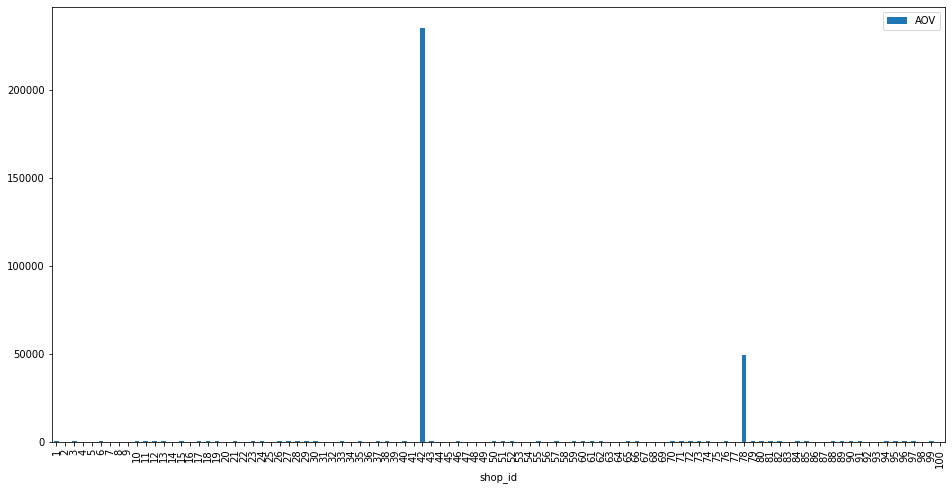

In [148]:
group_shop_data.plot.bar(figsize=(16,8))

In [149]:
group_shop_data.sort_values('AOV', ascending = False)

,AOV
shop_id,
42,235101.490196
78,49213.043478
50,403.545455
90,403.224490
38,390.857143
...,...
53,214.117647
100,213.675000
32,189.976190


Wow! Shop 42 and 78 average orders are quite the outliers compared to the mean order amount for the remaining 98 shops. **Shop 42** AOV is about **23,5101.49** and **shop 78** with an AOV of **$49,213.04.** This two shops call for concern and further probing into their transactions is required. First I would explore data for shop 42 alone to see the kind of transactions being carried out at this shop.

In [150]:
shop42_data = data[data['shop_id']==42].sort_values('order_amount', ascending = False) # To filter for shop 42 and view output in descending order

In [151]:
group_shop42_data = pd.DataFrame({'AOV': shop42_data.groupby(['user_id', 'total_items'])['order_amount'].mean()})#.reset_index()
group_shop42_data.sort_values('AOV', ascending=False)

,,AOV
user_id,total_items,
607,2000,704000
797,5,1760
926,4,1408
907,4,1408
726,3,1056
819,3,1056
808,3,1056
970,2,704
934,2,704


From the look of things, customer with user ID 607 is the one contributing the most to shop 42 avearge order value. In comparison to the next customer in ranking as shown on the table above, **user 607 purchases 2,000 items (order amount = 704,000)** per transaction, while the next customer **(user ID 797) purchases only 5 items (order amount = $1,760)** per transaction on the average. This difference is alarming, hence there is need to probe further into customer 607 transactions to see the pattern of transactions across the entire shops and possibly make inferences from the mode of payment as well. 

In [82]:
data[data['user_id']==607].sort_values('shop_id', ascending = False) # Filter for customer 607 alone

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


Apparently, customer 607 only shops at shop 42 and makes the same amount of purchase at every transaction using credit card at exactly 4am. This customer poses a red flag and needs to be audited for possible fraud. Going forward, i will take out this customer's transactions from the data as it is evidently an outlier that would skew the data, which would lead to bias in the conclusion being drawn from the analysis.

In addition, one thing to note is that, **price of shoe** at shop 42 goes for **$352 per pair**, which is reasonable and a good metric to measure shop 42's performance. But, one need to take a closer look at the volume and pattern of transactions being carried by one customer at this shop. 

**Note: **To compute the price per pair of shoe (PPS), I simply divided the order_amount column by the total_items column.

Next, I will explore shop 78 as well, which is the second shop with the huge AOV and will follow the same approach as was done for shop 42.

In [87]:
shop78_data = data[data['shop_id']==78].sort_values('order_amount', ascending = False) # To filter for shop 78 and view output in descending order

In [88]:
group_shop78_data = pd.DataFrame({'AOV': shop78_data.groupby(['user_id', 'total_items'])['order_amount'].mean()})#.reset_index()
group_shop78_data.sort_values('AOV', ascending=False)

,,AOV
user_id,total_items,
878,6,154350
834,4,102900
969,3,77175
787,3,77175
928,3,77175
962,3,77175
818,3,77175
817,3,77175
915,3,77175


From the table above, looking at the avearge order amount (AOV) per customer in shop 78, I could not see a distinguishable pattern in the manner of transactions (i.e., neither total_items, nor AOV columns) among the user_ids. Thus, this made me probe further to visualize the AOV on a bar graph as shown below, as well as compute the price per shoe at the shop.

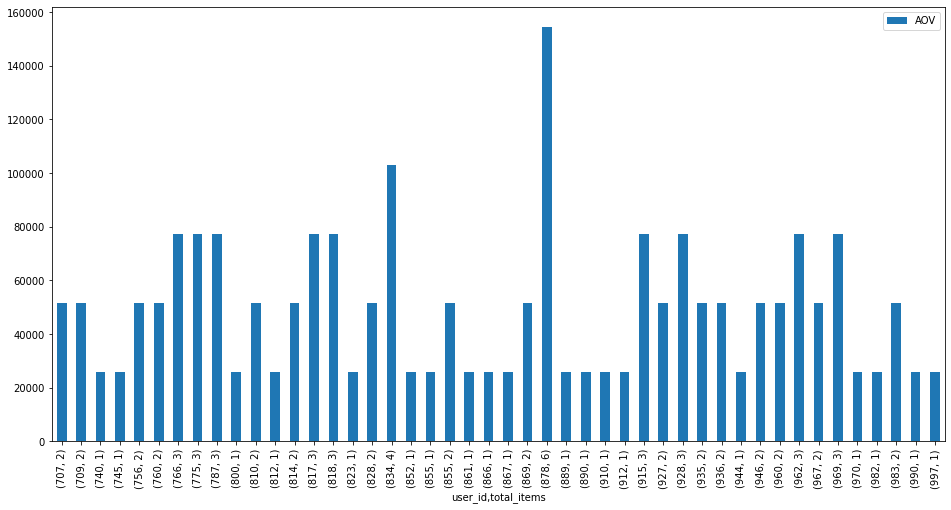

In [89]:
group_shop78_data.plot.bar(figsize=(16,8))

Voila! Now one could see a distinguishable difference in the customers transaction. One thing to note is that, we could not see a significant difference among the customers' transactions when looking at the table (using total_items column as the criteria) but, the difference is evident in the plot above in relation to the AOV's of these customers. This inferred the reason for computing the price per a pair of shoe at shop 78 - **OMG! a pair of shoe cost $25,725**. This is outrageous!

Kindly note that all shops sell the same model of sneakers, hence it is very unreasonable why one shop (e.g. shop 42) would sell a pair of shoe for $352 and another would sell the same pair for a whooping $$25,725. Shop 78 needs to be probe immediately as these transactions are suspicious and could be fraudulent. 

Thus, I identified the **top 5 customers** based on the AOV of these customers and crosscheck with other shops where they also shop from, in order to identify a pattern, if any in the manner of transactions as was done for user id 607. These user id include **878, 834, 969, 787, and 928.**

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
4215,4216,80,878,435,3,debit,2017-03-05 3:07:32
818,819,60,878,354,2,debit,2017-03-27 12:42:01
2011,2012,87,878,298,2,cash,2017-03-04 14:14:35
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51
3647,3648,98,878,266,2,cash,2017-03-06 1:49:57
4670,4671,98,878,266,2,debit,2017-03-30 0:22:20
3474,3475,20,878,254,2,cash,2017-03-17 3:43:03
4106,4107,26,878,176,1,debit,2017-03-20 4:32:18
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21


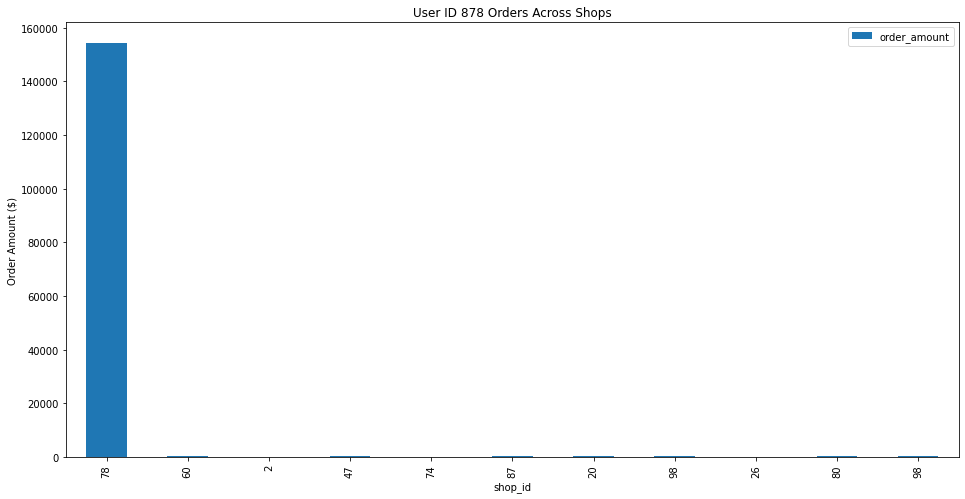

In [100]:
user878_data = data[data['user_id']==878] # Filter for customer 878 alone
user878_data.plot.bar('shop_id', 'order_amount', ylabel=('Order Amount ($)'), title=('User ID 878 Orders Across Shops'), figsize=(16,8))
user878_data.sort_values('order_amount', ascending = False)

The transaction made by user 878 at shop 78 is pretty suspicious for obvious reasons. As shown on the plot above and the table before the plot, this customer transaction from shop 78 is too high compared to other purchases made within 30 days across other shops for the same model of sneakers. This is very irrational.

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
2591,2592,79,834,543,3,credit_card,2017-03-15 5:32:35
2723,2724,33,834,519,3,debit,2017-03-19 5:25:59
2667,2668,18,834,468,3,credit_card,2017-03-23 21:53:56
4993,4994,4,834,384,3,debit,2017-03-18 4:12:20
2410,2411,6,834,374,2,debit,2017-03-15 9:56:43
2743,2744,85,834,344,2,cash,2017-03-28 12:46:31
2186,2187,55,834,342,2,credit_card,2017-03-18 23:47:06
1619,1620,95,834,336,2,debit,2017-03-05 15:16:05
1632,1633,73,834,330,2,cash,2017-03-27 14:03:19


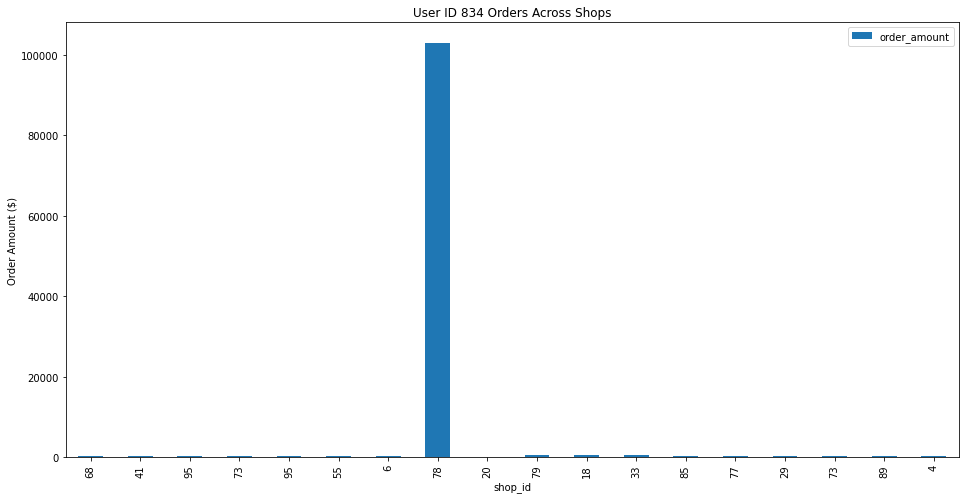

In [99]:
user834_data = data[data['user_id']==834] # Filter for customer 834 alone
user834_data.plot.bar('shop_id', 'order_amount', ylabel=('Order Amount ($)'), title=('User ID 834 Orders Across Shops'), figsize=(16,8))
user834_data.sort_values('order_amount', ascending = False)

Why am I not surprised. The pattern is glaring regarding shop 78 transactions looking at user 834 transactions across all the other shops. But, let's not jump the gun yet. I will explore the remaining 3 user ids before drawing my conclusion regarding this shop.

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
45,46,29,969,652,4,credit_card,2017-03-04 8:58:23
1183,1184,55,969,513,3,debit,2017-03-09 15:08:08
4583,4584,35,969,492,3,cash,2017-03-11 1:43:16
3162,3163,35,969,492,3,credit_card,2017-03-30 1:35:24
336,337,18,969,468,3,debit,2017-03-26 0:49:22
2968,2969,76,969,465,3,credit_card,2017-03-15 10:36:07
2851,2852,65,969,462,3,credit_card,2017-03-29 19:22:54
3639,3640,25,969,390,3,credit_card,2017-03-22 10:40:05
1511,1512,93,969,342,3,credit_card,2017-03-10 1:04:54


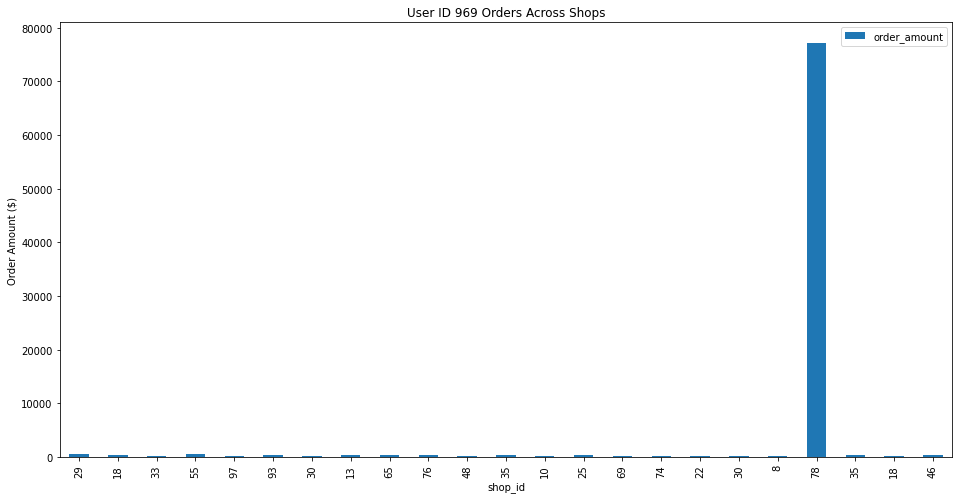

In [101]:
user969_data = data[data['user_id']==969] # Filter for customer 969 alone
user969_data.plot.bar('shop_id', 'order_amount', ylabel=('Order Amount ($)'), title=('User ID 969 Orders Across Shops'), figsize=(16,8))
user969_data.sort_values('order_amount', ascending = False)

😃 Here we go again! Same alarming transaction pattern as was in prior users regarding shop 78. Do we really need to explore further? Yes! we need to be torough as it will substantiate our conclusion. Next i will explore user  id 787 and finally user 928 in this order.

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
2782,2783,82,787,708,4,credit_card,2017-03-09 22:25:24
878,879,88,787,704,4,credit_card,2017-03-02 5:05:25
4566,4567,10,787,592,4,debit,2017-03-24 0:44:30
3907,3908,80,787,580,4,cash,2017-03-09 2:06:36
1729,1730,79,787,543,3,credit_card,2017-03-27 23:51:21
4172,4173,68,787,408,3,cash,2017-03-03 1:54:05
1917,1918,12,787,402,2,debit,2017-03-15 20:39:13
4876,4877,20,787,381,3,credit_card,2017-03-17 14:53:33
922,923,41,787,354,3,cash,2017-03-08 10:34:22


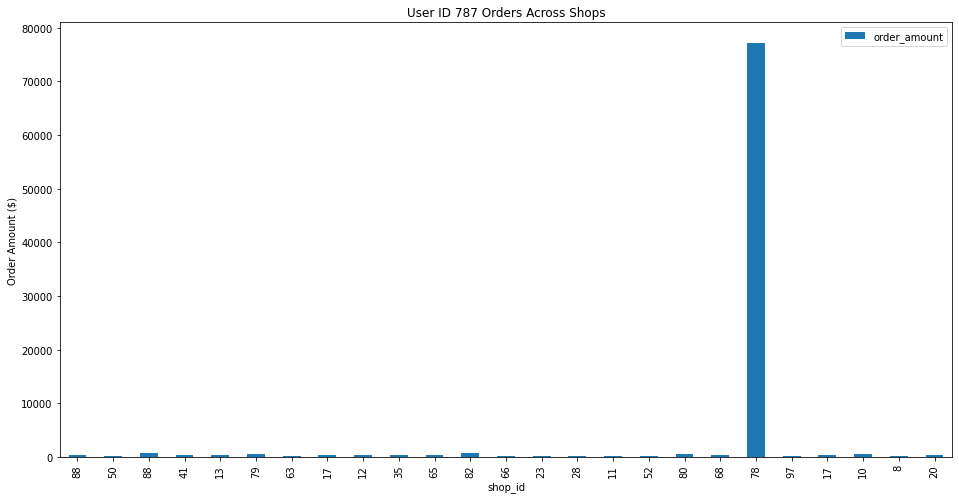

In [102]:
user787_data = data[data['user_id']==787] # Filter for customer 787 alone
user787_data.plot.bar('shop_id', 'order_amount', ylabel=('Order Amount ($)'), title=('User ID 787 Orders Across Shops'), figsize=(16,8))
user787_data.sort_values('order_amount', ascending = False)

No difference in the pattern here too for user 787 regarding the transactions at shop 78. It really beats me, why i would purchase 4 pairs of shoes at shop 82 for $708, then order 3 pairs at shop 78 for over 100% of the price at $$77,175. Shop 78 has some serious explaining to do to the auditors. Heads-up, I am pretty sure the narrative will not change for user id 928. But, for record purposes and evidence, I will still explore the user id regardless.  

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
2482,2483,48,928,468,4,credit_card,2017-03-24 13:27:35
189,190,43,928,362,2,debit,2017-03-30 7:00:14
1767,1768,59,928,356,2,cash,2017-03-24 6:07:49
2702,2703,73,928,330,2,credit_card,2017-03-27 8:51:12
2281,2282,84,928,306,2,credit_card,2017-03-25 19:19:01
2682,2683,58,928,276,2,debit,2017-03-18 1:23:51
2346,2347,49,928,258,2,debit,2017-03-23 21:12:14
244,245,32,928,202,2,cash,2017-03-30 9:30:28
4827,4828,61,928,158,1,debit,2017-03-08 21:30:59


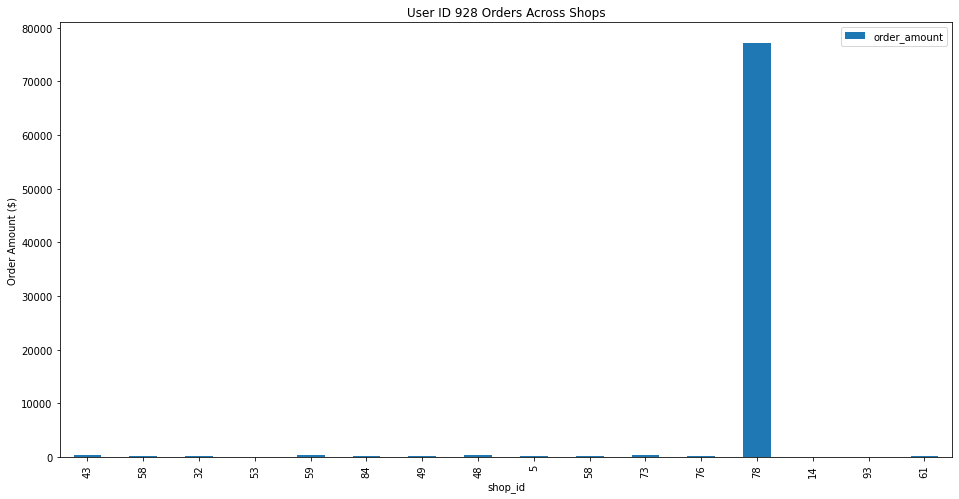

In [103]:
user928_data = data[data['user_id']==928] # Filter for customer 928 alone
user928_data.plot.bar('shop_id', 'order_amount', ylabel=('Order Amount ($)'), title=('User ID 928 Orders Across Shops'), figsize=(16,8))
user928_data.sort_values('order_amount', ascending = False)

Same story for this user as well. Shop 78 is definitely running suspicious transactions and this is a very big red flag with a very high propensity to being classified as "fraudulent transactions". This shop needs to be auditted.

Thus, as was done for eliminating user id 607, I will be eliminating shop_id 78 from the dataset as they are classified as outliers. Afterwards, I will explore the new data set and profer my suggestions based on the findings from the observed new data.

**Approach Summary of Findings**
- Subset dataset to eliminate outliers
- Plot distribution of dataset
- Generate descriptive statitics
- Respond to challenge questions

In [104]:
new_data = data[data['shop_id']!=78] # To eliminate shop 78 from the data
new_data = new_data[new_data['user_id']!=607] # To take out user 607 from the subset data
new_data.head() # To view the first 5 rows of the new dataset

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


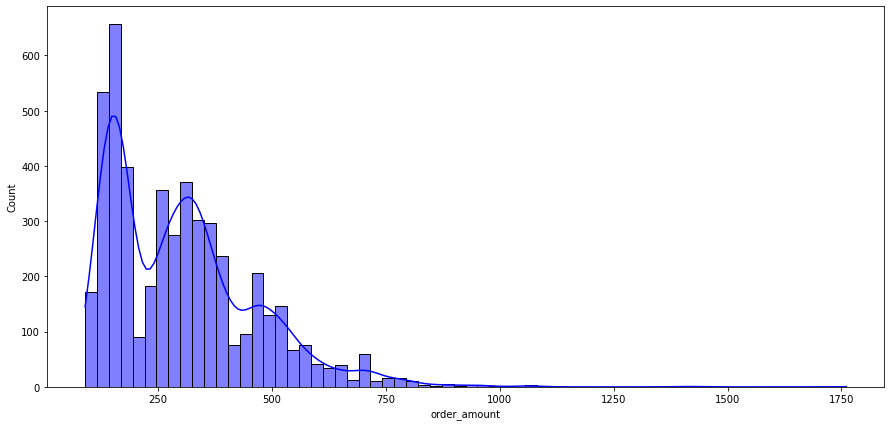

In [109]:
fig = plt.figure(figsize=(15,7))
sns.histplot(new_data['order_amount'], color='blue', kde=True)

<BarContainer object of 4937 artists>

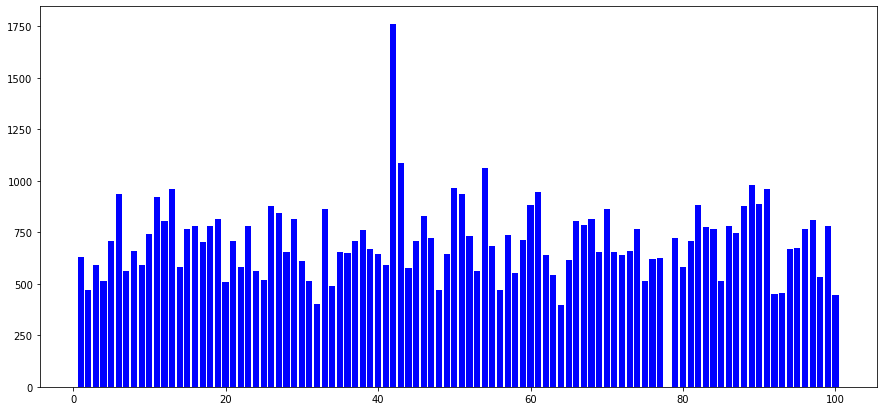

In [116]:
fig = plt.figure(figsize=(15,7))
plt.bar(new_data['shop_id'], new_data['order_amount'], color='blue')

In [152]:
fig = plt.figure(figsize=(25,14))
px.scatter(new_data, x='created_at', y='order_amount', color='payment_method', title='Order Amount at different time of the month')

<Figure size 1800x1008 with 0 Axes>

In [153]:
fig = plt.figure(figsize=(15,7))
px.scatter(new_data, x='created_at', y='order_amount', color='user_id', title='Order Amount at different time of the month')

<Figure size 1080x504 with 0 Axes>

In [131]:
fig = plt.figure(figsize=(15,7))
px.scatter(new_data, x='created_at', y='order_amount', color='shop_id', title='Order Amount at different time of the month')

<Figure size 1080x504 with 0 Axes>

From the histogram plot, one could see that the data is relatively normally distributed and the scatter plot showed 3 outliers which could be considered mild. All the outliers are from shop 42 which are, user id 797, 907, and 926 with payment methods cash, debit, and cash respectively. I will not be taking out this outliers as they are considered mild. Now, i will be drawing my conclusion using the output of the descriptive statistics below:

In [132]:
new_data.describe() # To get the descriptive statistics of the variables in the dataset

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [138]:
new_data.mode(axis=0, numeric_only=False, dropna=True).head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53.0,718.0,153.0,2.0,credit_card,2017-03-07 15:30:37
1,2,NaN,NaN,NaN,NaN,NaN,2017-03-09 10:46:09
2,3,NaN,NaN,NaN,NaN,NaN,2017-03-13 2:38:34
3,4,NaN,NaN,NaN,NaN,NaN,2017-03-29 7:10:18
4,5,NaN,NaN,NaN,NaN,NaN,NaN


**Summary of Findings**

Given that the challenge is focused on the AOV, I would say the computation of the naive AOV value is not wrong but its shortcomings (cons) could be devastating when dealing with semi-large dataset such as this. Reason being that, from the granular exploration of the data set, it shows that computing the AOV across board for the customers as was done initially would mask issues and possibly fraudulent activities as evident in shop 78 go unnoticed until it becomes a huge problem. Thus, I would suggest using the **individual shop price per sneakers** as an **additional metric** in measuring the performance of these shops.

Secondly, **shop 78** transactions needs to be audited because **$25,725** for a pair of sneakers compared to other store is a far cry from being legitimate transactions. Also, **user id 607** transactions at **shop 42** needs review, as the transactions could be an error in the data pull because the timing of transactions for this user id is the same **(4:00am)** for all transactions.

Finally, I would report the **mean order amount value** of **$302.58** as the metric for this dataset after the elimination of the two outliers (shop 78 and user id 607) in the dataset. Reason whyI went with the mean order amount is because it is not too far to the **median value of $$284**. Since, outliers has been been removed from the dataset, the mean would show a better representation of the distribution compared to the median. The **modal order amount is $$153** which is quite far from the mean or the median. Hence, I will not be suggesting this metric but could have been a better metric if I did not eliminate any outlier from the dataset.

Thank you very much and this concludes this data exploratory analysis 🙇!

### **Problem set 2:**

For this question you’ll need to use SQL. Data set required for the challenge is accessible [at this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL). Please use queries to answer the following questions. Paste your queries along with your final numerical answers below. 

> a. How many orders were shipped by Speedy Express in total?


> b. What is the last name of the employee with the most orders?


> c. What product was ordered the most by customers in Germany?

**Queries and Numerical Solutions**

**2a:** The total orders shipped by Speedy Express is **54**. See query below: 

In [ ]:
SELECT Shippers.ShipperName, COUNT(Orders.OrderID) AS TotalOrdersShipped 
FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName == "Speedy Express";

**2b:** The last name of the employee with the most orders is **Peacock** with **40 orders** in total. See query below:

In [ ]:
SELECT Employees.LastName, COUNT(Orders.OrderID) As TotalOrders
FROM Orders
LEFT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY LastName 
ORDER BY TotalOrders DESC
LIMIT 1;

**2c:** The most ordered product by customers in Germany is **Boston Crab Meat** with a **160 orders** in total. See query below:

In [ ]:
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS TotalOrderQuantity
FROM OrderDetails
JOIN Orders ON (OrderDetails.OrderID = Orders.OrderID)
JOIN Products ON (OrderDetails.ProductID = Products.ProductID)
JOIN Customers ON (Orders.CustomerID = Customers.CustomerID)
WHERE Customers.Country == "Germany"
GROUP BY ProductName 
ORDER BY TotalOrderQuantity DESC
LIMIT 3;